<table style="width: 100%; margin-left: auto; margin-right: auto; background-color: white;">
<tbody>
<tr>

<td style="text-align: center; width: 12%;"><img src=img/brasil-brasao.png alt="" /></td>

<td style="width: 68%;">
<h2 style="text-align: center; margin-top: 1%;">Rep&uacute;blica Federativa do Brasil</h2>
<h2 style="text-align: center; margin-top: 1%;">Minist&eacute;rio da Educa&ccedil;&atilde;o</h2>
<h2 style="text-align: center; margin-top: 1%;">Universidade Federal do Amazonas</h2>
<h2 style="text-align: center; margin-top: 1%;">Instituto de Computa&ccedil;&atilde;o</h2>
</td>

<td style="width: 12%;"><img src="img/UFAM-logo.png" alt="" /></td>

</tr>
</tbody>
</table>

---

# Ciência de Dados
## Trabalho Prático I: Exploração de Dados

_Professor Dr. Marco Cristo_

**Alunos:**  `Victor da Silva Dantas e Vinícius Gato Santana` <br>
**E-mail:** `victor.dantas@icomp.ufam.edu.br e vinicius.santana@icomp.ufam.edu.br`

#### Preliminares

In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

import sklearn
import sys

In [2]:
print("Python", sys.version)
print("--------")
print("Pandas:", pd.__version__)
print("Numpy:", np.__version__)
print("SKLearn:", sklearn.__version__)

Python 3.13.9 (tags/v3.13.9:8183fa5, Oct 14 2025, 14:09:13) [MSC v.1944 64 bit (AMD64)]
--------
Pandas: 2.3.3
Numpy: 2.3.4
SKLearn: 1.7.2


In [3]:
DATA_PQT = 'data/enem2019.parquet'
MUNICIPIO_PROVA = 'São Paulo' # Use o município que foi especificado para sua equipe.

In [4]:
# Caminho do arquivo
df_enem = pd.read_parquet(DATA_PQT)
df_enem.shape

(599982, 56)

----
#### Qualidade de dados

<div class="alert alert-info">
    <b>1</b> - Quais colunas possuem campos nulos em <code>df_enem</code>?<br><i>Dica</i>: Há muitas formas de fazer isso em Pandas, como por exemplo através da utilização do método `isnull()`.
</div>

In [5]:
print("Colunas com valores nulos e suas contagens:")
colunas_nulas = df_enem.columns[df_enem.isnull().any()]
print(df_enem[colunas_nulas].isnull().sum())

Colunas com valores nulos e suas contagens:
NO_MUNICIPIO_NASCIMENTO     15865
SG_UF_NASCIMENTO            15865
TP_ENSINO                  281116
CO_PROVA_CN                164220
CO_PROVA_CH                139291
CO_PROVA_LC                139291
CO_PROVA_MT                164220
NU_NOTA_CN                 164220
NU_NOTA_CH                 139291
NU_NOTA_LC                 139291
NU_NOTA_MT                 164220
TP_STATUS_REDACAO          139291
NU_NOTA_REDACAO            139291
dtype: int64


<div class="alert alert-info">
<b>2</b> - Remova todas as instâncias que não possuem valores para as colunas <code>NO_MUNICIPIO_NASCIMENTO</code> ou <code>SG_UF_NASCIMENTO</code> Para as colunas <code>CO_PROVA_CN</code>, <code>CO_PROVA_CH</code>, <code>CO_PROVA_LC</code>, <code>CO_PROVA_MT</code> e <code>TP_STATUS_REDACAO</code>, remova apenas as instâncias onde todos esses valores encontram-se ausentes.<br><i>Dica</i>: Os argumentos `subset` e `how`, do método `dropna()` do Pandas podem lhe ajudar.
</div>

In [6]:
# Remove instâncias onde SG_UF_NASCIMENTO é nulo
df_enem.dropna(subset=['SG_UF_NASCIMENTO'], inplace=True)

# Lista de colunas para verificação conjunta
colunas_verificacao_conjunta = [
    'CO_PROVA_CN', 'NO_MUNICIPIO_NASCIMENTO', 'CO_PROVA_CH',
    'CO_PROVA_LC', 'CO_PROVA_MT', 'TP_STATUS_REDACAO'
]

# Remove instâncias onde TODAS essas colunas são nulas
df_enem.dropna(subset=colunas_verificacao_conjunta, how='all', inplace=True)

In [7]:
print(df_enem[colunas_nulas].isnull().sum())

NO_MUNICIPIO_NASCIMENTO         0
SG_UF_NASCIMENTO                0
TP_ENSINO                  274389
CO_PROVA_CN                159938
CO_PROVA_CH                135803
CO_PROVA_LC                135803
CO_PROVA_MT                159938
NU_NOTA_CN                 159938
NU_NOTA_CH                 135803
NU_NOTA_LC                 135803
NU_NOTA_MT                 159938
TP_STATUS_REDACAO          135803
NU_NOTA_REDACAO            135803
dtype: int64


<div class="alert alert-info">
    <b>3</b> - Substitua dados faltantes por valores razoáveis. Valores ausentes nas colunas <code>TP_ENSINO</code> e <code>TP_STATUS_REDACAO</code> podem ser substituídos por 0 (0 = Não informado). No caso das notas, se elas forem NaN, podemos substituí-las por 0 (estamos penalizando quem faltou uma prova, mas fez as demais, em parte porque há poucos casos assim nesta base). Já os códigos do tipo de prova (<code>CO_PROVA_**</code>), quando ausentes, podem ser substuídos para 500 (_500 = Faltou à prova_). Após isso, imprima o vetor resultante para confirmar se não há mais valores NaNs. 
</div>

In [8]:
# Imprimir verificação de NaNs
print("Verificação de valores nulos restantes (antes tratamento principal):")
nulos_restantes = df_enem.isnull().sum()
print(nulos_restantes[nulos_restantes > 0])

Verificação de valores nulos restantes (antes tratamento principal):
TP_ENSINO            274389
CO_PROVA_CN          159938
CO_PROVA_CH          135803
CO_PROVA_LC          135803
CO_PROVA_MT          159938
NU_NOTA_CN           159938
NU_NOTA_CH           135803
NU_NOTA_LC           135803
NU_NOTA_MT           159938
TP_STATUS_REDACAO    135803
NU_NOTA_REDACAO      135803
dtype: int64


In [9]:
# TP_ENSINO e TP_STATUS_REDACAO por 0
colunas_para_zero_info = ['TP_ENSINO', 'TP_STATUS_REDACAO']
# Garantir que as colunas existem antes de preencher
colunas_para_zero_validas = [col for col in colunas_para_zero_info if col in df_enem.columns]
df_enem[colunas_para_zero_validas] = df_enem[colunas_para_zero_validas].fillna(0)

# Notas (NU_NOTA_**) por 0
colunas_notas = [col for col in df_enem.columns if col.startswith('NU_NOTA_')]
df_enem[colunas_notas] = df_enem[colunas_notas].fillna(0)

# Códigos de prova (CO_PROVA_**) por 500
colunas_cod_prova = [col for col in df_enem.columns if col.startswith('CO_PROVA_')]
df_enem[colunas_cod_prova] = df_enem[colunas_cod_prova].fillna(500)

# Imprimir verificação de NaNs
print("Verificação de valores nulos restantes (após tratamento principal):")
nulos_restantes = df_enem.isnull().sum()
print(nulos_restantes[nulos_restantes > 0])

Verificação de valores nulos restantes (após tratamento principal):
Series([], dtype: int64)


----
#### Análise e visualização de dados

<div class="alert alert-info">
<b>4</b> - Considerando a distribuição de notas em sua cidade de estudo, quem se saiu melhor: alunos das escolas de ensino médio públicas ou privadas? O mesmo se observa para o resto do país? Finalmente, para que provas, o desempenho das escolas públicas da sua cidade de interesse é <i>significativamente</i> pior (confiança de 95%) que a observada nas escolas do resto do país?<br><i>Dica</i>: boxplots são ótimos para comparar distribuições. Você pode verificar relevância da diferença nas notas usando um teste não paramétrico (ex: mannwhitneyu) unicaudal.
</div>

--- Análise: São Paulo ---


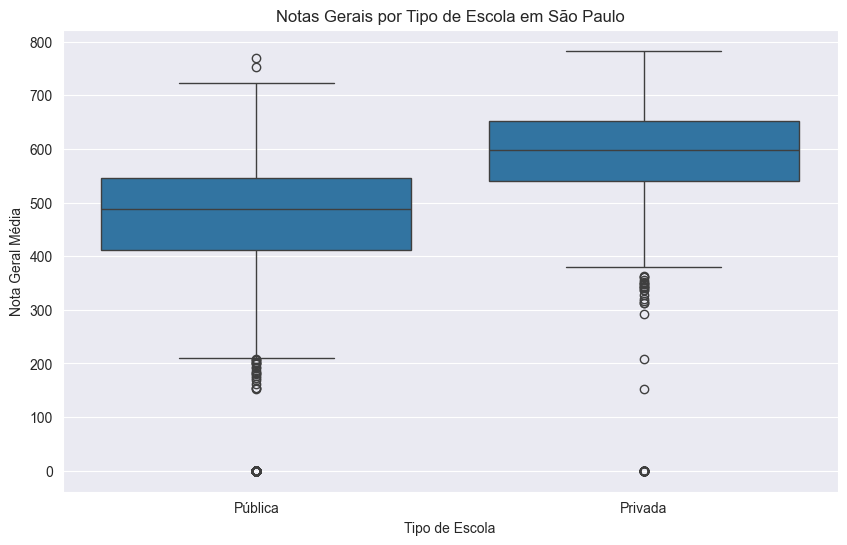

--- Análise: Resto do País ---


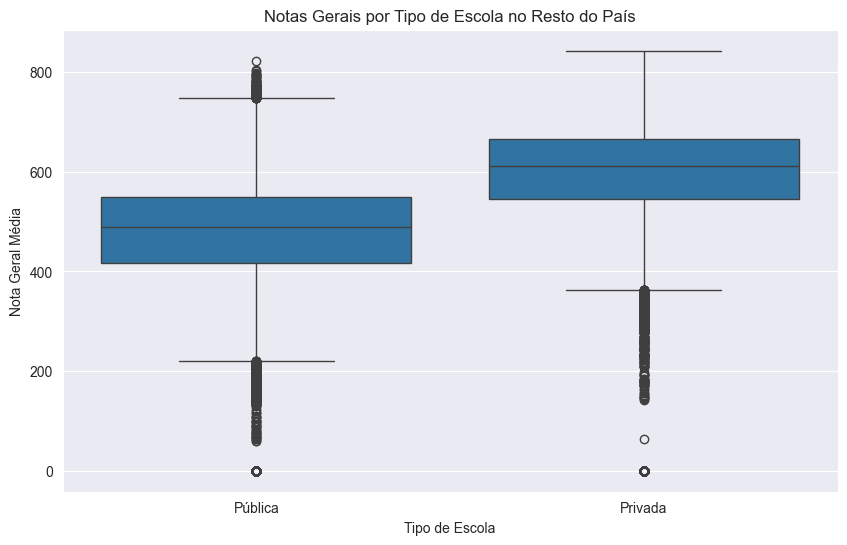


--- Teste de Significância: Públicas (São Paulo vs. Resto do País) ---
H1: Notas(Pública_Cidade) < Notas(Pública_Resto)

Prova: NU_NOTA_CN
  Média São Paulo (Pública): 463.64
  Média Resto do País (Pública): 466.90
  P-valor (Mann-Whitney U, 'less'): 0.0435
  -> Significativo: Desempenho em NU_NOTA_CN em São Paulo é PIOR.

Prova: NU_NOTA_CH
  Média São Paulo (Pública): 504.29
  Média Resto do País (Pública): 498.93
  P-valor (Mann-Whitney U, 'less'): 1.0000
  -> Não Significativo.

Prova: NU_NOTA_LC
  Média São Paulo (Pública): 524.30
  Média Resto do País (Pública): 515.49
  P-valor (Mann-Whitney U, 'less'): 1.0000
  -> Não Significativo.

Prova: NU_NOTA_MT
  Média São Paulo (Pública): 514.00
  Média Resto do País (Pública): 510.78
  P-valor (Mann-Whitney U, 'less'): 0.9978
  -> Não Significativo.

Prova: NU_NOTA_REDACAO
  Média São Paulo (Pública): 563.43
  Média Resto do País (Pública): 583.15
  P-valor (Mann-Whitney U, 'less'): 0.0000
  -> Significativo: Desempenho em NU_NOTA_REDA

In [10]:
# --- Definições ---
cidade_interesse = "São Paulo"
coluna_municipio = 'NO_MUNICIPIO_RESIDENCIA'
colunas_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
coluna_escola = 'TP_ESCOLA'
# --- Fim Definições ---

# 1. Preparação dos dataframes
df_cidade = df_enem[df_enem[coluna_municipio] == cidade_interesse].copy()
df_resto_pais = df_enem[df_enem[coluna_municipio] != cidade_interesse].copy()

# Mapa baseado no Dicionário de Dados (TP_ESCOLA)
mapa_escola = {1: 'Não Respondeu', 2: 'Pública', 3: 'Privada', 4: 'Exterior'}
df_cidade['TIPO_ESCOLA_LABEL'] = df_cidade[coluna_escola].map(mapa_escola)
df_resto_pais['TIPO_ESCOLA_LABEL'] = df_resto_pais[coluna_escola].map(mapa_escola)

df_cidade_escolas = df_cidade[df_cidade[coluna_escola].isin([2, 3])].copy()
df_resto_pais_escolas = df_resto_pais[df_resto_pais[coluna_escola].isin([2, 3])].copy()

df_cidade_escolas['NOTA_GERAL'] = df_cidade_escolas[colunas_notas].mean(axis=1)
df_resto_pais_escolas['NOTA_GERAL'] = df_resto_pais_escolas[colunas_notas].mean(axis=1)

# 2. Boxplot: Comparação na cidade de interesse
print(f"--- Análise: {cidade_interesse} ---")
plt.figure(figsize=(10, 6))
sns.boxplot(x='TIPO_ESCOLA_LABEL', y='NOTA_GERAL', data=df_cidade_escolas, order=['Pública', 'Privada'])
plt.title(f'Notas Gerais por Tipo de Escola em {cidade_interesse}')
plt.xlabel('Tipo de Escola')
plt.ylabel('Nota Geral Média')
plt.show()

# 3. Boxplot: Comparação no resto do país
print("--- Análise: Resto do País ---")
plt.figure(figsize=(10, 6))
sns.boxplot(x='TIPO_ESCOLA_LABEL', y='NOTA_GERAL', data=df_resto_pais_escolas, order=['Pública', 'Privada'])
plt.title('Notas Gerais por Tipo de Escola no Resto do País')
plt.xlabel('Tipo de Escola')
plt.ylabel('Nota Geral Média')
plt.show()

# 4. Teste de significância (Mann-Whitney U)
print(f"\n--- Teste de Significância: Públicas ({cidade_interesse} vs. Resto do País) ---")
print("H1: Notas(Pública_Cidade) < Notas(Pública_Resto)")

notas_publica_cidade = df_cidade_escolas[df_cidade_escolas['TIPO_ESCOLA_LABEL'] == 'Pública']
notas_publica_resto = df_resto_pais_escolas[df_resto_pais_escolas['TIPO_ESCOLA_LABEL'] == 'Pública']
alpha = 0.05

for prova in colunas_notas:
    dados_cidade = notas_publica_cidade[notas_publica_cidade[prova] > 0][prova]
    dados_resto = notas_publica_resto[notas_publica_resto[prova] > 0][prova]

    if dados_cidade.empty or dados_resto.empty:
        print(f"\nProva: {prova} - Dados insuficientes.")
        continue

    stat, p_value = stats.mannwhitneyu(
        dados_cidade,
        dados_resto,
        alternative='less'
    )

    print(f"\nProva: {prova}")
    print(f"  Média {cidade_interesse} (Pública): {dados_cidade.mean():.2f}")
    print(f"  Média Resto do País (Pública): {dados_resto.mean():.2f}")
    print(f"  P-valor (Mann-Whitney U, 'less'): {p_value:.4f}")

    if p_value < alpha:
        print(f"  -> Significativo: Desempenho em {prova} em {cidade_interesse} é PIOR.")
    else:
        print(f"  -> Não Significativo.")

<div class="alert alert-primary">
<b>4.1</b> - Explique os resultados obtidos.
</div>

1.  **Comparação Pública vs. Privada (Nota Geral Média):**
    * **Em São Paulo:** O gráfico "Notas Gerais por Tipo de Escola em São Paulo" mostra que os alunos de escolas privadas tiveram um desempenho geral (Nota Geral Média) superior ao dos alunos de escolas públicas. Isso é visualmente claro, pois a caixa (representando o intervalo interquartil, ou 50% central dos alunos) e a mediana (a linha central) do grupo "Privada" estão posicionadas significativamente mais altas no eixo Y do que as do grupo "Pública".
    * **No Resto do País:** O mesmo padrão é observado no gráfico "Notas Gerais por Tipo de Escola no Resto do País". Os alunos de escolas privadas, em média, também superam os alunos de escolas públicas.
    * **Conclusão:** Respondendo à primeira pergunta, tanto em São Paulo quanto no resto do país, os alunos de escolas privadas apresentaram as melhores notas gerais.

2.  **Comparação Escolas Públicas (São Paulo vs. Resto do País):**
    * O "Teste de Significância" foi realizado para comparar especificamente o desempenho dos alunos de **escolas públicas** de São Paulo com os alunos de **escolas públicas** do resto do país, testando a hipótese de que o desempenho em São Paulo seria *pior* (H1: `Notas(Pública_Cidade) < Notas(Pública_Resto)`).
    * O teste foi feito com um nível de confiança de 95%, o que significa que um `p-valor` abaixo de 0.05 indica um resultado estatisticamente significativo.
    * **Provas com Desempenho Pior em SP:**
        * **Ciências da Natureza (NU_NOTA_CN):** O `p-valor` foi de **0.0435** (menor que 0.05). Isso confirma que a média ligeiramente menor em São Paulo (463.64) em comparação com o resto do país (466.90) é uma diferença estatisticamente significativa.
        * **Redação (NU_NOTA_REDACAO):** O `p-valor` foi **0.0000** (muito menor que 0.05), indicando um resultado altamente significativo. A média das escolas públicas de São Paulo em redação (563.43) foi substancialmente pior que a do resto do país (583.15).
    * **Provas Sem Diferença Significativa (ou Melhores em SP):**
        * Para Ciências Humanas (CH), Linguagens e Códigos (LC) e Matemática (MT), os `p-valores` foram 1.0000, 1.0000 e 0.9978, respectivamente.
        * Esses valores (muito acima de 0.05) indicam que não há evidência estatística para afirmar que o desempenho de São Paulo foi *pior*. Na verdade, as médias de SP nessas três provas foram ligeiramente *superiores* às do resto do país, por isso a hipótese `less` (menor que) foi rejeitada de forma tão conclusiva.

<div class="alert alert-info">
<b>5</b> - Como se comparam os inscritos que fizeram a prova com intuito de apenas treinar seus conhecimentos com os demais? E o que se observa para o resto do país? Finalmente, para que provas de sua cidade de interesse, o desempenho dos alunos treinando é significativamente melhor (confiança de 95%) que o dos alunos fazendo a prova para valer? Novamente considere as distribuições de notas, mas desta vez use gráficos de violino e avalie diferenças de notas com o teste T de Student. 
</div> 

--- Análise Treineiros: São Paulo ---


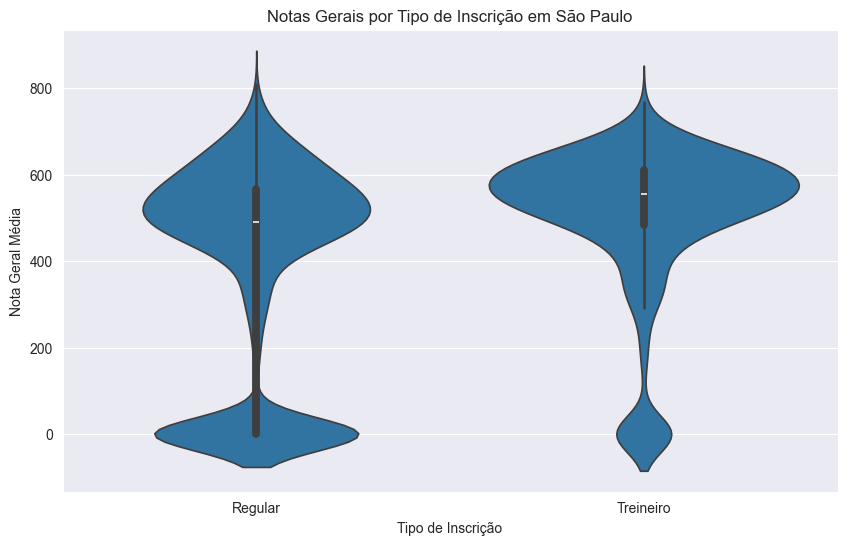

--- Análise Treineiros: Resto do País ---


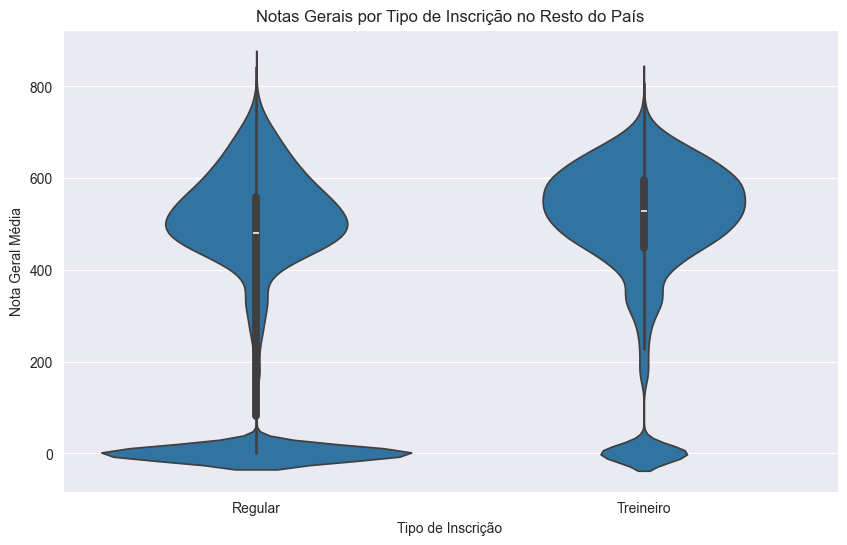


--- Teste T: Treineiros vs. Regulares (São Paulo) ---
H1: Notas(Treineiro) > Notas(Regular)

Prova: NU_NOTA_CN
  Média Treineiros (São Paulo): 519.84
  Média Regulares (São Paulo): 493.63
  P-valor (Teste T, 'greater'): 0.0000
  -> Significativo: Desempenho dos treineiros em NU_NOTA_CN em São Paulo é MELHOR.

Prova: NU_NOTA_CH
  Média Treineiros (São Paulo): 549.01
  Média Regulares (São Paulo): 529.42
  P-valor (Teste T, 'greater'): 0.0000
  -> Significativo: Desempenho dos treineiros em NU_NOTA_CH em São Paulo é MELHOR.

Prova: NU_NOTA_LC
  Média Treineiros (São Paulo): 555.87
  Média Regulares (São Paulo): 540.27
  P-valor (Teste T, 'greater'): 0.0000
  -> Significativo: Desempenho dos treineiros em NU_NOTA_LC em São Paulo é MELHOR.

Prova: NU_NOTA_MT
  Média Treineiros (São Paulo): 592.01
  Média Regulares (São Paulo): 547.23
  P-valor (Teste T, 'greater'): 0.0000
  -> Significativo: Desempenho dos treineiros em NU_NOTA_MT em São Paulo é MELHOR.

Prova: NU_NOTA_REDACAO
  Média Tre

In [11]:
coluna_treineiro = 'IN_TREINEIRO'

mapa_treineiro = {0: 'Regular', 1: 'Treineiro'} # 0=Não, 1=Sim
df_cidade['TREINEIRO_LABEL'] = df_cidade[coluna_treineiro].map(mapa_treineiro)
df_resto_pais['TREINEIRO_LABEL'] = df_resto_pais[coluna_treineiro].map(mapa_treineiro)

df_cidade['NOTA_GERAL'] = df_cidade[colunas_notas].mean(axis=1)
df_resto_pais['NOTA_GERAL'] = df_resto_pais[colunas_notas].mean(axis=1)

df_cidade_treino = df_cidade.dropna(subset=['TREINEIRO_LABEL', 'NOTA_GERAL'])
df_resto_pais_treino = df_resto_pais.dropna(subset=['TREINEIRO_LABEL', 'NOTA_GERAL'])

# 1. Violino: Comparação na cidade de interesse
print(f"--- Análise Treineiros: {cidade_interesse} ---")
plt.figure(figsize=(10, 6))
sns.violinplot(x='TREINEIRO_LABEL', y='NOTA_GERAL', data=df_cidade_treino, order=['Regular','Treineiro'])
plt.title(f'Notas Gerais por Tipo de Inscrição em {cidade_interesse}')
plt.xlabel('Tipo de Inscrição')
plt.ylabel('Nota Geral Média')
plt.show()

# 2. Violino: Comparação no resto do país
print("--- Análise Treineiros: Resto do País ---")
plt.figure(figsize=(10, 6))
sns.violinplot(x='TREINEIRO_LABEL', y='NOTA_GERAL', data=df_resto_pais_treino, order=['Regular', 'Treineiro'])
plt.title('Notas Gerais por Tipo de Inscrição no Resto do País')
plt.xlabel('Tipo de Inscrição')
plt.ylabel('Nota Geral Média')
plt.show()

# 3. Teste T de Student
print(f"\n--- Teste T: Treineiros vs. Regulares ({cidade_interesse}) ---")
print("H1: Notas(Treineiro) > Notas(Regular)")

notas_treineiro_cidade = df_cidade_treino[df_cidade_treino['TREINEIRO_LABEL'] == 'Treineiro']
notas_regular_cidade = df_cidade_treino[df_cidade_treino['TREINEIRO_LABEL'] == 'Regular']
alpha = 0.05

for prova in colunas_notas:
    dados_treineiro = notas_treineiro_cidade[notas_treineiro_cidade[prova] > 0][prova]
    dados_regular = notas_regular_cidade[notas_regular_cidade[prova] > 0][prova]

    if dados_treineiro.empty or dados_regular.empty:
        print(f"\nProva: {prova} - Dados insuficientes.")
        continue

    levene_stat, levene_p = stats.levene(dados_treineiro, dados_regular)
    equal_var = levene_p > alpha

    stat, p_value = stats.ttest_ind(
        dados_treineiro,
        dados_regular,
        equal_var=equal_var,
        alternative='greater'
    )

    print(f"\nProva: {prova}")
    print(f"  Média Treineiros ({cidade_interesse}): {dados_treineiro.mean():.2f}")
    print(f"  Média Regulares ({cidade_interesse}): {dados_regular.mean():.2f}")
    print(f"  P-valor (Teste T, 'greater'): {p_value:.4f}")

    if p_value < alpha:
        print(f"  -> Significativo: Desempenho dos treineiros em {prova} em {cidade_interesse} é MELHOR.")
    else:
        print(f"  -> Não Significativo.")

<div class="alert alert-primary">
<b>5.1</b> - Explique os resultados obtidos.
</div>

1.  **Comparação em São Paulo (Análise Visual):**
    O gráfico de violino "Notas Gerais por Tipo de Inscrição em São Paulo" compara a distribuição das notas gerais médias entre inscritos "Regulares" e "Treineiros". Visualmente, observa-se que a distribuição dos "Treineiros" está deslocada para cima:
    * A mediana (linha branca central) dos treineiros é visivelmente mais alta que a dos regulares.
    * A parte mais "larga" do violino (onde se concentra a maior parte dos alunos) também está em um patamar de nota mais alto para os treineiros.
    Isso sugere que, em média, os treineiros em São Paulo tiveram um desempenho geral superior.

2.  **Comparação no Resto do País:**
    (A imagem "Análise Treineiros: Resto do País" não foi fornecida para análise visual, mas a pergunta 5 presume uma comparação).

3.  **Análise de Significância (Teste T em São Paulo):**
    O "Teste T" foi usado para verificar se o desempenho dos treineiros era *significativamente melhor* (H1: `Notas(Treineiro) > Notas(Regular)`) do que o dos alunos regulares, com 95% de confiança (ou seja, `p-valor` < 0.05).
    * Os resultados mostram que, em São Paulo, os treineiros tiveram médias superiores às dos regulares em **todas as cinco áreas avaliadas** (Ciências da Natureza, Ciências Humanas, Linguagens e Códigos, Matemática e Redação).
    * Para todas as cinco provas, o `p-valor` foi **0.0000**.
    * **Conclusão:** Como 0.0000 é muito menor que o limite de 0.05, podemos afirmar com alta confiança estatística que o desempenho dos alunos "Treineiros" em São Paulo foi, de fato, significativamente melhor que o dos alunos "Regulares" em todas as provas.

<div class="alert alert-info">
<b>6</b> - Sobre a redação, como se comparam os desempenhos dos inscritos conforme o ano de conclusão do ensino médio em sua cidade de interesse? E no resto do país? Usando um gráfico de linhas, trace as notas médias obtidas contra o ano de conclusão.<br><i>ATENÇÃO</i>: Em `TP_ANO_CONCLUIU`, defina 2019 para todas as intâncias onde `TP_ST_CONCLUSAO` seja igual a 2 (2 = "Estou cursando e concluirei o Ensino Médio em 2019").
</div> 

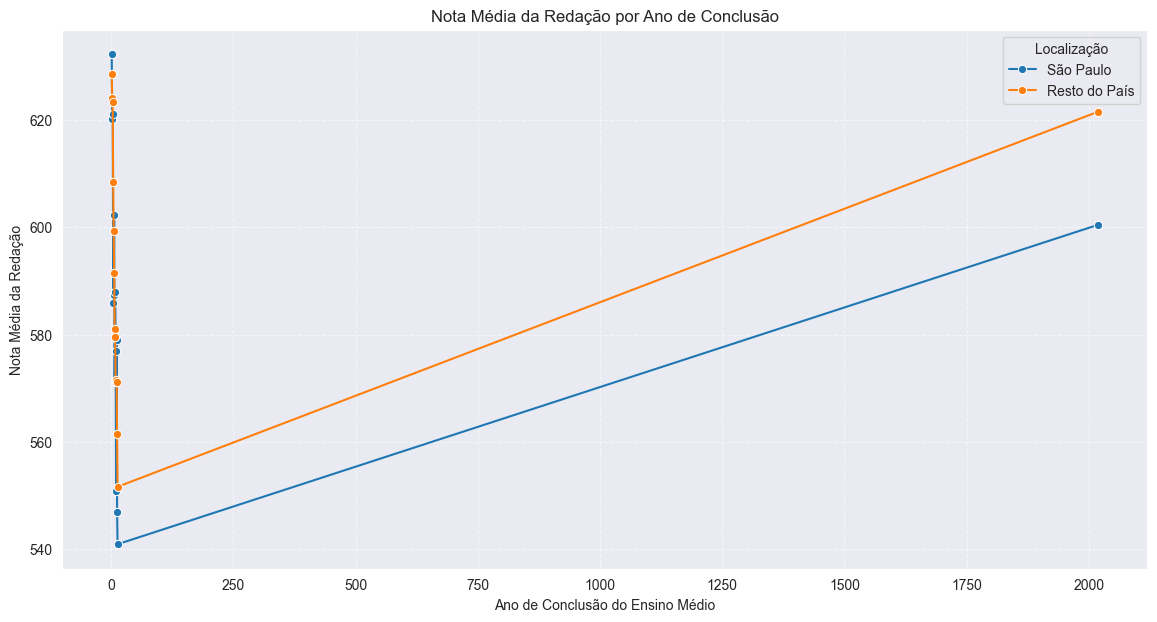

In [12]:
coluna_ano_concluiu = 'TP_ANO_CONCLUIU'
coluna_status_conclusao = 'TP_ST_CONCLUSAO'
nota_redacao = 'NU_NOTA_REDACAO'

# Dicionário (TP_ST_CONCLUSAO): 2 = "Estou cursando e concluirei o Ensino Médio em 2019"
df_enem[coluna_ano_concluiu] = np.where(
    df_enem[coluna_status_conclusao] == 2,
    2019,
    df_enem[coluna_ano_concluiu]
)

# Recriar os dataframes de cidade/resto
df_cidade = df_enem[df_enem[coluna_municipio] == cidade_interesse].copy()
df_resto_pais = df_enem[df_enem[coluna_municipio] != cidade_interesse].copy()

# Calcular médias por ano de conclusão (considerando notas > 0)
dados_redacao_cidade = df_cidade[
    (df_cidade[coluna_ano_concluiu] > 0) & (df_cidade[nota_redacao] > 0)
]
media_cidade_ano = dados_redacao_cidade.groupby(coluna_ano_concluiu)[nota_redacao].mean().reset_index()

dados_redacao_resto = df_resto_pais[
    (df_resto_pais[coluna_ano_concluiu] > 0) & (df_resto_pais[nota_redacao] > 0)
]
media_resto_ano = dados_redacao_resto.groupby(coluna_ano_concluiu)[nota_redacao].mean().reset_index()

media_cidade_ano['Local'] = cidade_interesse
media_resto_ano['Local'] = 'Resto do País'
media_combinada = pd.concat([media_cidade_ano, media_resto_ano])

# 1. Gráfico de Linhas
plt.figure(figsize=(14, 7))
sns.lineplot(
    x=coluna_ano_concluiu,
    y=nota_redacao,
    hue='Local',
    data=media_combinada,
    marker='o'
)
plt.title('Nota Média da Redação por Ano de Conclusão')
plt.xlabel('Ano de Conclusão do Ensino Médio')
plt.ylabel('Nota Média da Redação')
plt.legend(title='Localização')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

<div class="alert alert-primary">
<b>6.1</b> - Explique os resultados obtidos.
</div>

1.  **Comparação Geográfica (São Paulo vs. Resto do País):**
    A linha laranja ("Resto do País") está consistentemente acima da linha azul ("São Paulo") em todos os pontos do eixo X. Isso indica que, para todos os grupos de "ano de conclusão" analisados, a nota média da redação dos inscritos do "Resto do País" foi superior à nota média dos inscritos de "São Paulo".

2.  **Tendência por Ano de Conclusão:**
    Observa-se uma forte tendência de que os alunos que concluíram o Ensino Médio mais recentemente obtiveram as notas médias mais altas. Os pontos mais altos no gráfico correspondem ao grupo de `2019` e ao grupo de `1` (que significa 2018). À medida que o ano de conclusão se torna mais antigo (os valores no eixo X do cluster aumentam), a nota média da redação tende a diminuir para ambos os grupos (São Paulo e Resto do País).

<div class="alert alert-info">
    <b>7</b> - Qual a relação entre o grau de instrução dos pais (<code>Q001</code> e <code>Q002</code>) e o desempenho dos seus filhos, tanto na sua cidade de interesse quanto no resto do país? Considere a média de todas as notas do candidato como seu desempenho. 
</div> 

--- Análise: Instrução do Pai (Q001) ---


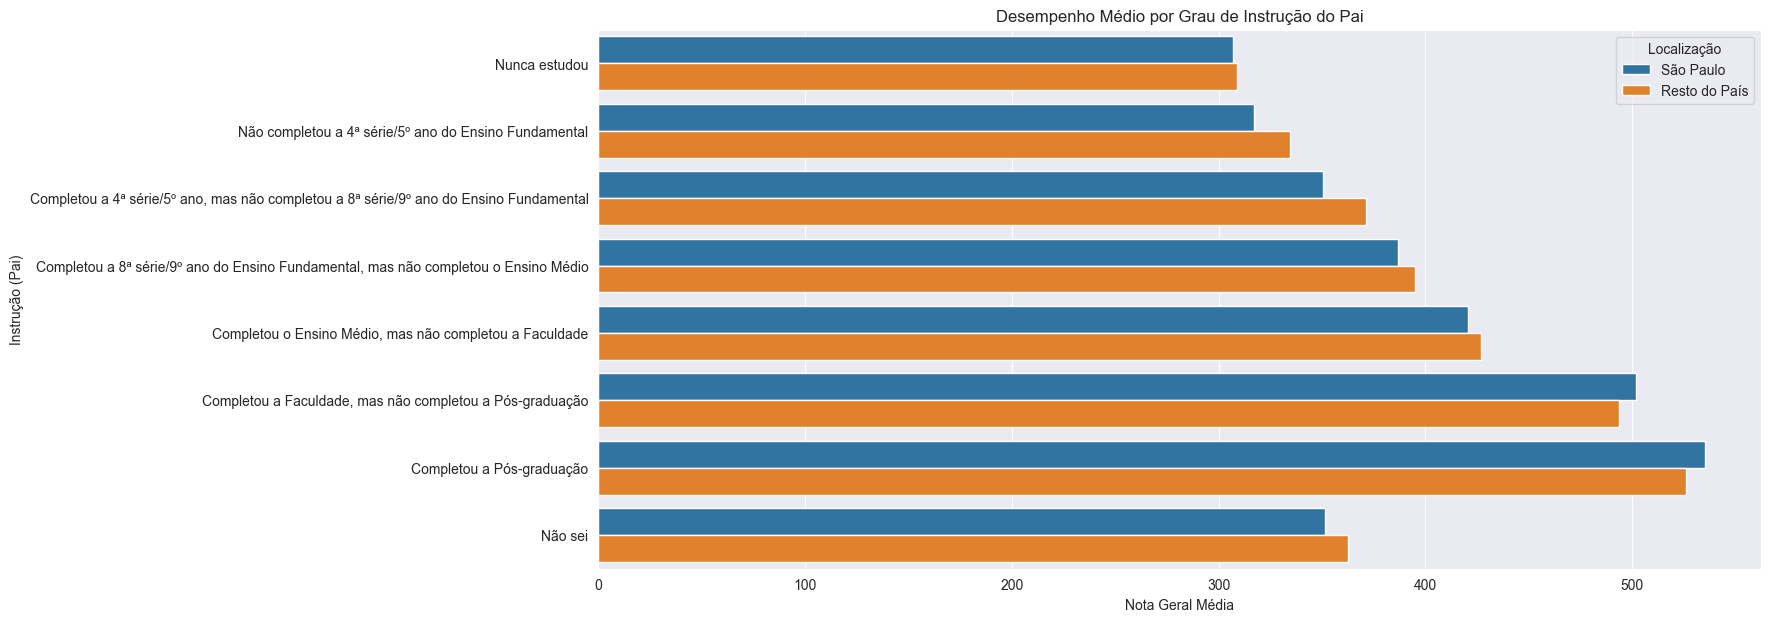

--- Análise: Instrução da Mãe (Q002) ---


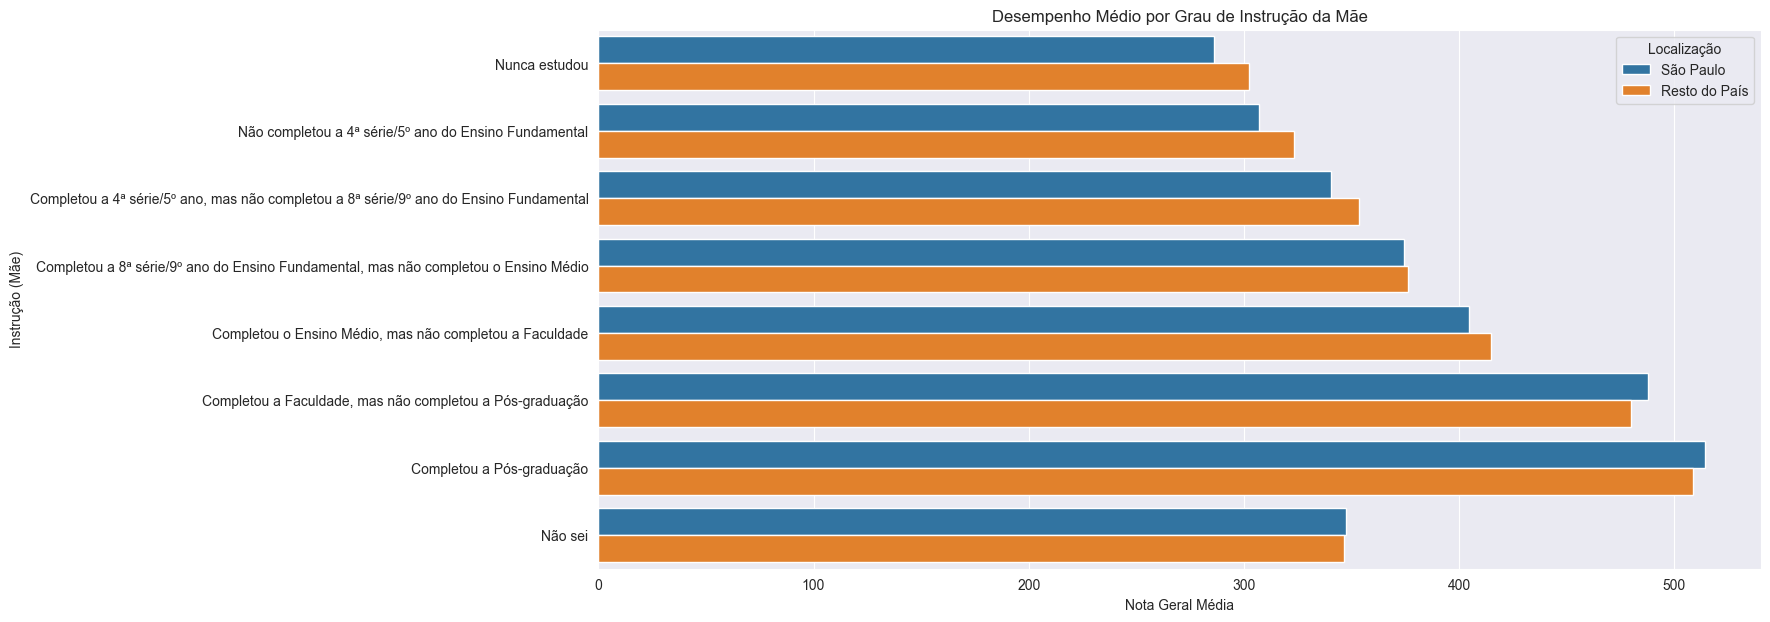

In [13]:
if 'NOTA_GERAL' not in df_cidade.columns:
    df_cidade['NOTA_GERAL'] = df_cidade[colunas_notas].mean(axis=1)
    df_resto_pais['NOTA_GERAL'] = df_resto_pais[colunas_notas].mean(axis=1)

q_pai = 'Q001'
q_mae = 'Q002'

# Mapa baseado no Dicionário de Dados (Q001, Q002)
mapa_instrucao = {
    'A': 'Nunca estudou', 'B': 'Não completou a 4ª série/5º ano do Ensino Fundamental',
    'C': 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental',
    'D': 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio',
    'E': 'Completou o Ensino Médio, mas não completou a Faculdade',
    'F': 'Completou a Faculdade, mas não completou a Pós-graduação',
    'G': 'Completou a Pós-graduação', 'H': 'Não sei'
}
ordem_instrucao = [
    'Nunca estudou', 'Não completou a 4ª série/5º ano do Ensino Fundamental',
    'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental',
    'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio',
    'Completou o Ensino Médio, mas não completou a Faculdade',
    'Completou a Faculdade, mas não completou a Pós-graduação',
    'Completou a Pós-graduação', 'Não sei'
]

# 1. Análise Q001 (Pai)
df_cidade['PAI_INSTRUCAO'] = df_cidade[q_pai].map(mapa_instrucao)
df_resto_pais['PAI_INSTRUCAO'] = df_resto_pais[q_pai].map(mapa_instrucao)

media_pai_cidade = df_cidade.groupby('PAI_INSTRUCAO')['NOTA_GERAL'].mean().reindex(ordem_instrucao).reset_index()
media_pai_resto = df_resto_pais.groupby('PAI_INSTRUCAO')['NOTA_GERAL'].mean().reindex(ordem_instrucao).reset_index()

media_pai_cidade['Local'] = cidade_interesse
media_pai_resto['Local'] = 'Resto do País'
media_pai = pd.concat([media_pai_cidade, media_pai_resto])

print("--- Análise: Instrução do Pai (Q001) ---")
plt.figure(figsize=(15, 7))
sns.barplot(x='NOTA_GERAL', y='PAI_INSTRUCAO', hue='Local', data=media_pai, orient='h')
plt.title('Desempenho Médio por Grau de Instrução do Pai')
plt.xlabel('Nota Geral Média')
plt.ylabel('Instrução (Pai)')
plt.legend(title='Localização')
plt.show()

# 2. Análise Q002 (Mãe)
df_cidade['MAE_INSTRUCAO'] = df_cidade[q_mae].map(mapa_instrucao)
df_resto_pais['MAE_INSTRUCAO'] = df_resto_pais[q_mae].map(mapa_instrucao)

media_mae_cidade = df_cidade.groupby('MAE_INSTRUCAO')['NOTA_GERAL'].mean().reindex(ordem_instrucao).reset_index()
media_mae_resto = df_resto_pais.groupby('MAE_INSTRUCAO')['NOTA_GERAL'].mean().reindex(ordem_instrucao).reset_index()

media_mae_cidade['Local'] = cidade_interesse
media_mae_resto['Local'] = 'Resto do País'
media_mae = pd.concat([media_mae_cidade, media_mae_resto])

print("--- Análise: Instrução da Mãe (Q002) ---")
plt.figure(figsize=(15, 7))
sns.barplot(x='NOTA_GERAL', y='MAE_INSTRUCAO', hue='Local', data=media_mae, orient='h')
plt.title('Desempenho Médio por Grau de Instrução da Mãe')
plt.xlabel('Nota Geral Média')
plt.ylabel('Instrução (Mãe)')
plt.legend(title='Localização')
plt.show()

<div class="alert alert-primary">
<b>7.1</b> - Explique os resultados obtidos.
</div>

Ambos os gráficos, que analisam a instrução do pai (Q001) e da mãe (Q002), mostram duas tendências claras:

1.  **Correlação Positiva entre Educação e Desempenho:**
    Há uma relação direta e positiva entre o nível de instrução dos pais e o desempenho médio dos alunos. Em ambos os gráficos, tanto para "São Paulo" quanto para o "Resto do País", a "Nota Geral Média" (comprimento da barra) aumenta consistentemente à medida que o nível educacional dos pais sobe, partindo de "Nunca estudou" (notas mais baixas) até "Completou a Pós-graduação" (notas mais altas).

2.  **Comparação Geográfica (São Paulo vs. Resto do País):**
    A relação entre as duas localizações se inverte dependendo do nível de instrução:
    * **Níveis Baixo e Médio:** Para os alunos cujos pais têm instrução até o Ensino Médio (incluindo "Não completou a 4ª série", "Completou o Ensino Médio", etc.), os inscritos do "Resto do País" (barra laranja/marrom) apresentam, em geral, uma nota média ligeiramente superior à dos inscritos de "São Paulo" (barra azul).
    * **Níveis Superiores:** A tendência se inverte nos níveis mais altos. Para alunos cujos pais (tanto pai quanto mãe) completaram a "Faculdade" ou a "Pós-graduação", os inscritos de "São Paulo" (barra azul) passam a ter um desempenho médio ligeiramente superior ao do "Resto do País".

**Ainda considerando o desempenho calculado na questão anterior e, agora, as seguintes faixas de renda (`Q006`):**

A = Nenhuma renda.<br/>B = Até R\\$ 998,00.<br/>C = De R\\$ 998,01 até R\\$ 1.497,00.<br/>D = De R\\$ 1.497,01 até R\\$ 1.996,00.<br/>E = De R\\$ 1.996,01 até R\\$ 2.495,00.<br/>F = De R\\$ 2.495,01 até R\\$ 2.994,00.<br/>G = De R\\$ 2.994,01 até R\\$ 3.992,00.<br/>H = De R\\$ 3.992,01 até R\\$ 4.990,00.<br/>I = De R\\$ 4.990,01 até R\\$ 5.988,00.<br/>J = De R\\$ 5.988,01 até R\\$ 6.986,00.<br/>K = De R\\$ 6.986,01 até R\\$ 7.984,00.<br/>L = De R\\$ 7.984,01 até R\\$ 8.982,00.<br/>M = De R\\$ 8.982,01 até R\\$ 9.980,00.<br/>N = De R\\$ 9.980,01 até R\\$ 11.976,00.<br/>O = De R\\$ 11.976,01 até R\\$ 14.970,00.<br/>P = De R\\$ 14.970,01 até R\\$ 19.960,00.<br/>Q = Mais de R\\$ 19.960,00.<br/>

Responda:

<div class="alert alert-info">
<b>8</b> - É possível afirmar que, dos inscritos que concluem o ensino médio em 2019, os mais ricos são os que obtém o maior desempenho, tanto na sua cidade de interesse quanto no resto do país? Neste caso, além de uma inspeção visual, prove sua afirmação usando um teste de correlação de Spearman.
</div>

--- Análise Renda vs. Desempenho (Concluintes 2019): São Paulo ---


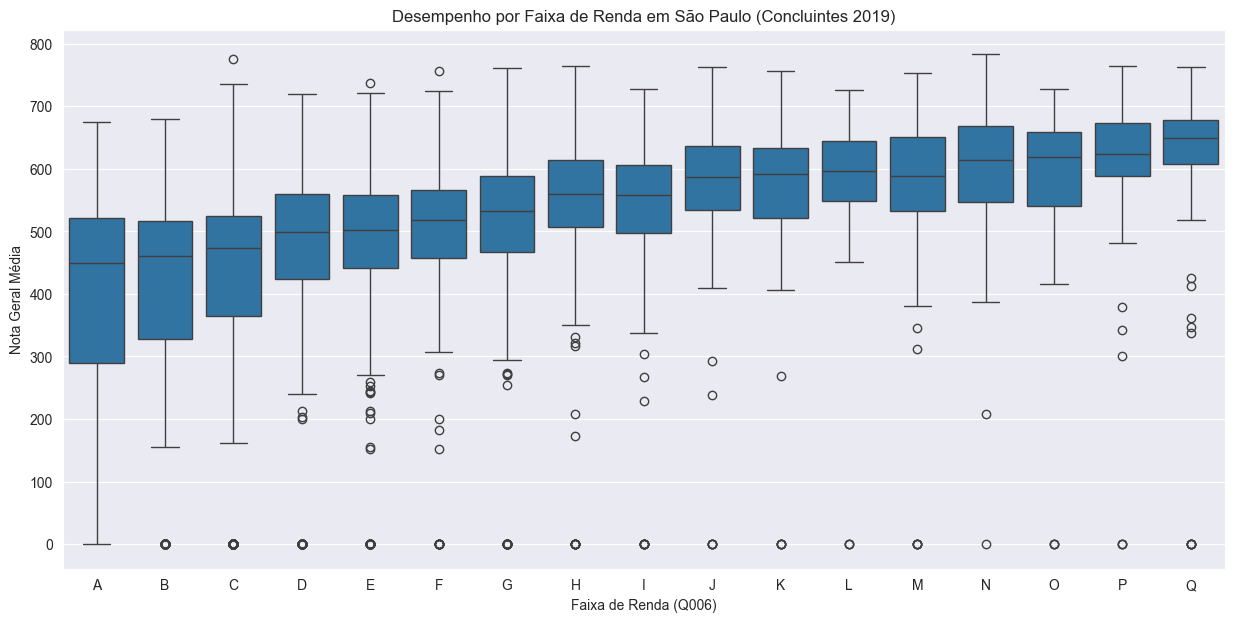

--- Análise Renda vs. Desempenho (Concluintes 2019): Resto do País ---


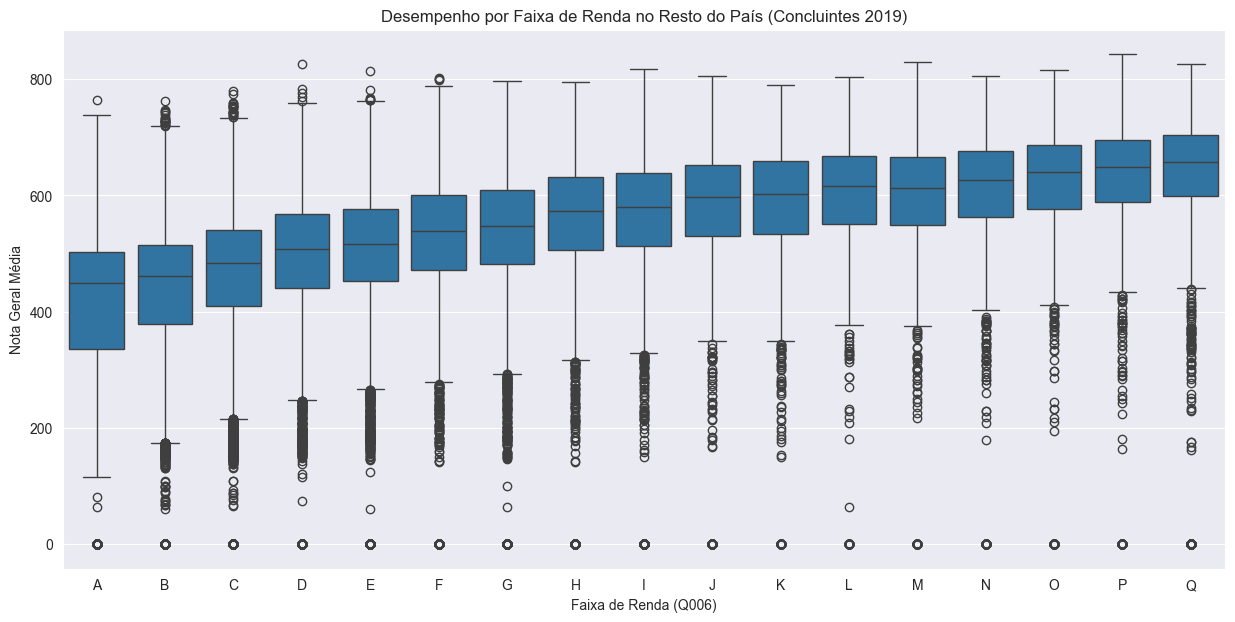


--- Correlação de Spearman (Renda Ordinal x Nota Geral) ---
  São Paulo:
    Correlação (rho): 0.4757
    P-valor: 0.0000

  Resto do País:
    Correlação (rho): 0.4675
    P-valor: 0.0000


In [14]:
coluna_renda = 'Q006'

# Mapeamento ordinal de Renda (A=0, B=1, ..., Q=16)
mapa_renda_ordinal = {
    'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7,
    'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14,
    'P': 15, 'Q': 16
}
ordem_renda_str = list(mapa_renda_ordinal.keys())

df_cidade['RENDA_ORDINAL'] = df_cidade[coluna_renda].map(mapa_renda_ordinal)
df_resto_pais['RENDA_ORDINAL'] = df_resto_pais[coluna_renda].map(mapa_renda_ordinal)

# Filtrar por concluintes em 2019 (coluna tratada em #6)
concluintes_2019_cidade = df_cidade[df_cidade[coluna_ano_concluiu] == 2019]
concluintes_2019_resto = df_resto_pais[df_resto_pais[coluna_ano_concluiu] == 2019]

# 1. Inspeção Visual (Boxplot) - Cidade
print(f"--- Análise Renda vs. Desempenho (Concluintes 2019): {cidade_interesse} ---")
plt.figure(figsize=(15, 7))
sns.boxplot(x=coluna_renda, y='NOTA_GERAL', data=concluintes_2019_cidade, order=ordem_renda_str)
plt.title(f'Desempenho por Faixa de Renda em {cidade_interesse} (Concluintes 2019)')
plt.xlabel('Faixa de Renda (Q006)')
plt.ylabel('Nota Geral Média')
plt.show()

# 2. Inspeção Visual (Boxplot) - Resto do País
print("--- Análise Renda vs. Desempenho (Concluintes 2019): Resto do País ---")
plt.figure(figsize=(15, 7))
sns.boxplot(x=coluna_renda, y='NOTA_GERAL', data=concluintes_2019_resto, order=ordem_renda_str)
plt.title('Desempenho por Faixa de Renda no Resto do País (Concluintes 2019)')
plt.xlabel('Faixa de Renda (Q006)')
plt.ylabel('Nota Geral Média')
plt.show()

# 3. Teste de Correlação de Spearman
dados_teste_cidade = concluintes_2019_cidade.dropna(subset=['RENDA_ORDINAL', 'NOTA_GERAL'])
dados_teste_resto = concluintes_2019_resto.dropna(subset=['RENDA_ORDINAL', 'NOTA_GERAL'])

corr_cidade, p_cidade = stats.spearmanr(dados_teste_cidade['RENDA_ORDINAL'], dados_teste_cidade['NOTA_GERAL'])
corr_resto, p_resto = stats.spearmanr(dados_teste_resto['RENDA_ORDINAL'], dados_teste_resto['NOTA_GERAL'])

print(f"\n--- Correlação de Spearman (Renda Ordinal x Nota Geral) ---")
print(f"  {cidade_interesse}:")
print(f"    Correlação (rho): {corr_cidade:.4f}")
print(f"    P-valor: {p_cidade:.4f}")

print(f"\n  Resto do País:")
print(f"    Correlação (rho): {corr_resto:.4f}")
print(f"    P-valor: {p_resto:.4f}")

<div class="alert alert-primary">
<b>8.1</b> - Explique os resultados obtidos.
</div>

Sim, é possível afirmar que, entre os concluintes de 2019, os inscritos de faixas de renda mais altas (mais ricos) são os que obtêm o maior desempenho, tanto em São Paulo quanto no resto do país.

Essa afirmação é suportada por duas evidências:

1.  **Inspeção Visual (Gráficos Boxplot):**
    * Em ambos os gráficos ("...em São Paulo" e "...no Resto do País"), observa-se uma clara tendência de subida. À medida que a "Faixa de Renda (Q006)" avança da esquerda para a direita (de 'A', menor renda, para 'Q', maior renda), a posição das caixas (medianas e intervalos interquartis) no eixo "Nota Geral Média" eleva-se consistentemente. Isso indica visualmente que notas mais altas estão associadas a rendas mais altas.

2.  **Prova Estatística (Correlação de Spearman):**
    * O teste de Spearman foi usado para medir a força e a direção da relação entre a renda (uma variável ordinal) e a nota (uma variável numérica).
    * **Correlação (rho):** Em ambos os casos, os coeficientes de correlação (rho) são positivos e moderados (São Paulo: `0.4757`; Resto do País: `0.4675`). Um valor positivo confirma que, à medida que o nível de renda aumenta, o desempenho também tende a aumentar.
    * **P-valor:** Para ambos os grupos, o `P-valor` é `0.0000`. Sendo este valor muito menor que o nível de significância padrão (como 0.05), ele indica que a correlação positiva observada é estatisticamente significativa e não é provável que tenha ocorrido por acaso.

Portanto, tanto a análise visual quanto o teste estatístico provam a afirmação.

<div class="alert alert-info">
    <b>9</b> - Qual a nota geral média dos alunos, de acordo com o tipo de estado civil (<code>TP_ESTADO_CIVIL</code>), tanto em sua cidade de interesse quanto no resto do país?
</div>

--- Análise: Desempenho por Estado Civil ---


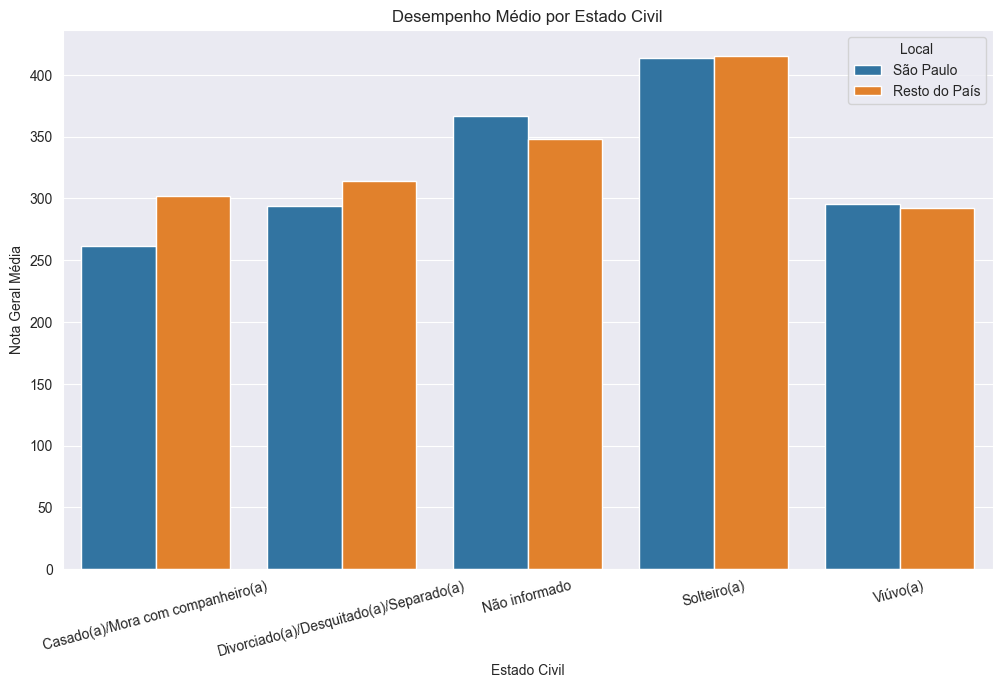

In [15]:
coluna_estado_civil = 'TP_ESTADO_CIVIL'

# Mapa baseado no Dicionário de Dados (TP_ESTADO_CIVIL)
mapa_estado_civil = {
    0: 'Não informado', 1: 'Solteiro(a)', 2: 'Casado(a)/Mora com companheiro(a)',
    3: 'Divorciado(a)/Desquitado(a)/Separado(a)', 4: 'Viúvo(a)'
}

df_cidade['ESTADO_CIVIL_LABEL'] = df_cidade[coluna_estado_civil].map(mapa_estado_civil)
df_resto_pais['ESTADO_CIVIL_LABEL'] = df_resto_pais[coluna_estado_civil].map(mapa_estado_civil)

media_civil_cidade = df_cidade.groupby('ESTADO_CIVIL_LABEL')['NOTA_GERAL'].mean().reset_index()
media_civil_resto = df_resto_pais.groupby('ESTADO_CIVIL_LABEL')['NOTA_GERAL'].mean().reset_index()

media_civil_cidade['Local'] = cidade_interesse
media_civil_resto['Local'] = 'Resto do País'
media_civil = pd.concat([media_civil_cidade, media_civil_resto])

print("--- Análise: Desempenho por Estado Civil ---")
plt.figure(figsize=(12, 7))
sns.barplot(x='ESTADO_CIVIL_LABEL', y='NOTA_GERAL', hue='Local', data=media_civil)
plt.title('Desempenho Médio por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Nota Geral Média')
plt.xticks(rotation=15)
plt.show()


<div class="alert alert-primary">
<b>9.1</b> - Explique os resultados obtidos.
</div>

1.  **Desempenho por Categoria:** O grupo "Solteiro(a)" apresenta, de longe, a maior "Nota Geral Média" entre todas as categorias. Isso é válido tanto em São Paulo quanto no Resto do País, com ambas as médias ultrapassando os 400 pontos.

2.  **Outras Categorias:** O grupo "Não informado" apresenta o segundo melhor desempenho, seguido por "Divorciado(a)/Desquitado(a)/Separado(a)". Os grupos "Casado(a)/Mora com companheiro(a)" e "Viúvo(a)" apresentam as notas médias mais baixas.

3.  **Comparação Geográfica:**
    * Para o grupo de maior desempenho, "Solteiro(a)", a nota média é quase idêntica entre "São Paulo" e o "Resto do País".
    * Nos grupos "Não informado" e "Viúvo(a)", os inscritos de "São Paulo" (barra azul) tiveram uma média ligeiramente superior.
    * Nos grupos "Casado(a)/Mora com companheiro(a)" e "Divorciado(a)/Desquitado(a)/Separado(a)", os inscritos do "Resto do País" (barra marrom) tiveram um desempenho médio superior ao de São Paulo.

<div class="alert alert-info">
    <b>10</b> - Qual a nota geral média dos alunos, de acordo com o tipo da lingua estrangeira escolhida (<code>TP_LINGUA</code>) tanto em sua cidade de interesse quanto no resto do país?
</div>

--- Análise: Desempenho por Língua Estrangeira ---


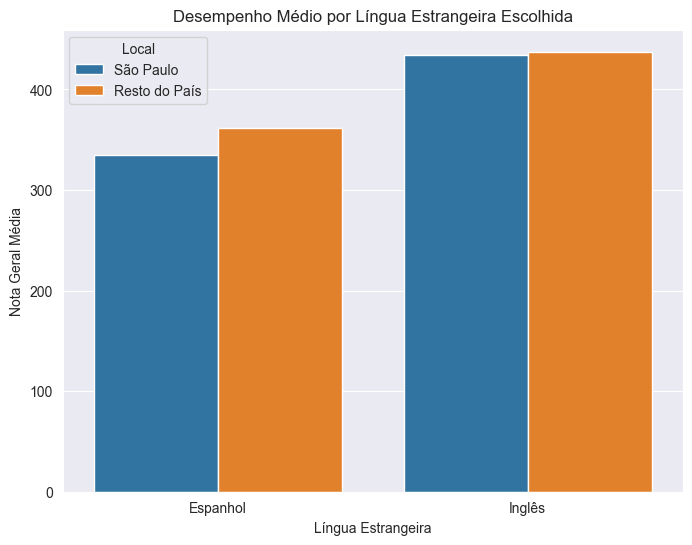

In [16]:
coluna_lingua = 'TP_LINGUA'

# Mapa baseado no Dicionário de Dados (TP_LINGUA)
mapa_lingua = {0: 'Inglês', 1: 'Espanhol'}

df_cidade['LINGUA_LABEL'] = df_cidade[coluna_lingua].map(mapa_lingua)
df_resto_pais['LINGUA_LABEL'] = df_resto_pais[coluna_lingua].map(mapa_lingua)

media_lingua_cidade = df_cidade.groupby('LINGUA_LABEL')['NOTA_GERAL'].mean().reset_index()
media_lingua_resto = df_resto_pais.groupby('LINGUA_LABEL')['NOTA_GERAL'].mean().reset_index()

media_lingua_cidade['Local'] = cidade_interesse
media_lingua_resto['Local'] = 'Resto do País'
media_lingua = pd.concat([media_lingua_cidade, media_lingua_resto])

print("--- Análise: Desempenho por Língua Estrangeira ---")
plt.figure(figsize=(8, 6))
sns.barplot(x='LINGUA_LABEL', y='NOTA_GERAL', hue='Local', data=media_lingua)
plt.title('Desempenho Médio por Língua Estrangeira Escolhida')
plt.xlabel('Língua Estrangeira')
plt.ylabel('Nota Geral Média')
plt.show()

<div class="alert alert-primary">
<b>10.1</b> - Explique os resultados obtidos.
</div>

1.  **Desempenho por Língua:** Há uma diferença de desempenho muito significativa entre as duas línguas. Os inscritos que escolheram "Inglês" obtiveram uma "Nota Geral Média" substancialmente mais alta (acima dos 400 pontos) do que os inscritos que escolheram "Espanhol" (cujas médias ficaram abaixo de 375). Isso ocorre tanto em São Paulo quanto no Resto do País.

2.  **Desempenho por Localização:** Em ambas as escolhas de língua, os inscritos do "Resto do País" (barra marrom) apresentaram uma nota geral média ligeiramente superior à dos inscritos de "São Paulo" (barra azul).

<div class="alert alert-info">
    <b>11</b> - Qual a nota geral média dos alunos, de acordo com ocupação dos pais/responsáveis e (<code>Q003</code> e <code>Q004</code>) tanto em sua cidade de interesse quanto no resto do país?
</div>

--- Análise: Ocupação do Pai (Q003) ---


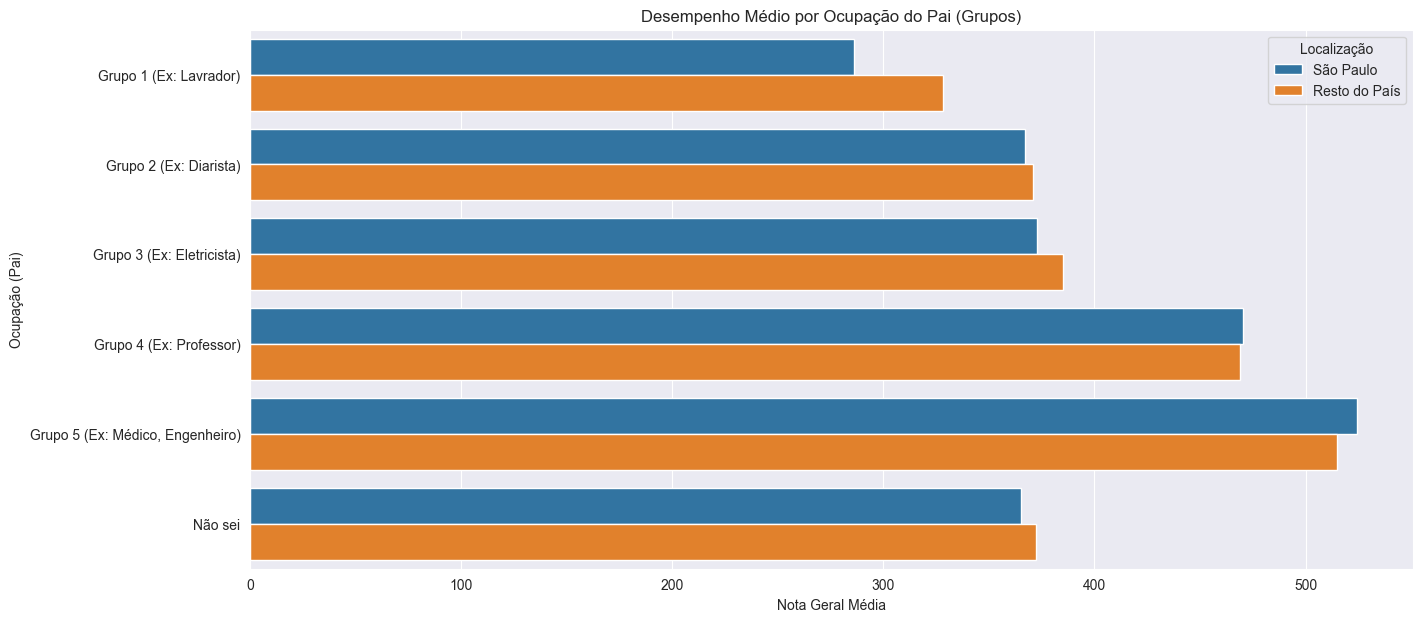

--- Análise: Ocupação da Mãe (Q004) ---


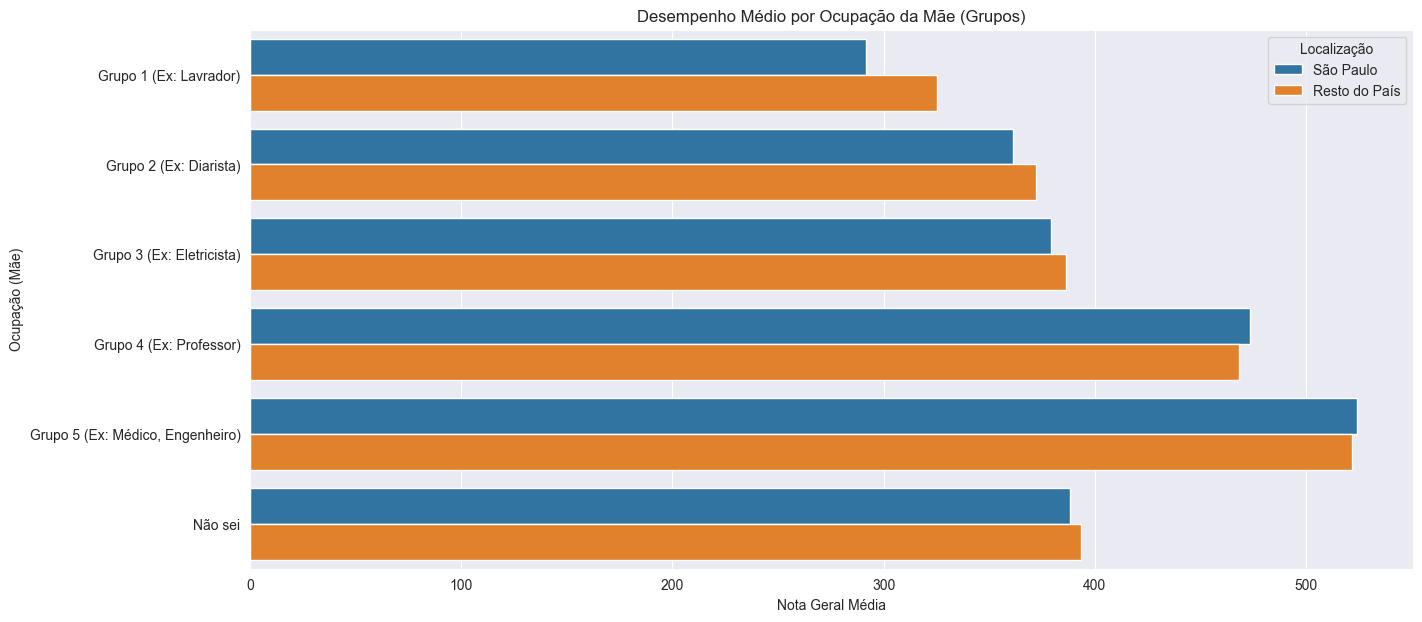

In [17]:
q_ocup_pai = 'Q003'
q_ocup_mae = 'Q004'

# Mapa baseado no Dicionário de Dados (Q003, Q004)
mapa_ocupacao = {
    'A': 'Grupo 1 (Ex: Lavrador)',
    'B': 'Grupo 2 (Ex: Diarista)',
    'C': 'Grupo 3 (Ex: Eletricista)',
    'D': 'Grupo 4 (Ex: Professor)',
    'E': 'Grupo 5 (Ex: Médico, Engenheiro)',
    'F': 'Não sei'
}
ordem_ocupacao = list(mapa_ocupacao.values())

# 1. Análise Q003 (Pai)
df_cidade['PAI_OCUPACAO'] = df_cidade[q_ocup_pai].map(mapa_ocupacao)
df_resto_pais['PAI_OCUPACAO'] = df_resto_pais[q_ocup_pai].map(mapa_ocupacao)

media_ocup_pai_cidade = df_cidade.groupby('PAI_OCUPACAO')['NOTA_GERAL'].mean().reindex(ordem_ocupacao).reset_index()
media_ocup_pai_resto = df_resto_pais.groupby('PAI_OCUPACAO')['NOTA_GERAL'].mean().reindex(ordem_ocupacao).reset_index()

media_ocup_pai_cidade['Local'] = cidade_interesse
media_ocup_pai_resto['Local'] = 'Resto do País'
media_ocup_pai = pd.concat([media_ocup_pai_cidade, media_ocup_pai_resto])

print("--- Análise: Ocupação do Pai (Q003) ---")
plt.figure(figsize=(15, 7))
sns.barplot(x='NOTA_GERAL', y='PAI_OCUPACAO', hue='Local', data=media_ocup_pai, orient='h')
plt.title('Desempenho Médio por Ocupação do Pai (Grupos)')
plt.xlabel('Nota Geral Média')
plt.ylabel('Ocupação (Pai)')
plt.legend(title='Localização')
plt.show()

# 2. Análise Q004 (Mãe)
df_cidade['MAE_OCUPACAO'] = df_cidade[q_ocup_mae].map(mapa_ocupacao)
df_resto_pais['MAE_OCUPACAO'] = df_resto_pais[q_ocup_mae].map(mapa_ocupacao)

media_ocup_mae_cidade = df_cidade.groupby('MAE_OCUPACAO')['NOTA_GERAL'].mean().reindex(ordem_ocupacao).reset_index()
media_ocup_mae_resto = df_resto_pais.groupby('MAE_OCUPACAO')['NOTA_GERAL'].mean().reindex(ordem_ocupacao).reset_index()

media_ocup_mae_cidade['Local'] = cidade_interesse
media_ocup_mae_resto['Local'] = 'Resto do País'
media_ocup_mae = pd.concat([media_ocup_mae_cidade, media_ocup_mae_resto])

print("--- Análise: Ocupação da Mãe (Q004) ---")
plt.figure(figsize=(15, 7))
sns.barplot(x='NOTA_GERAL', y='MAE_OCUPACAO', hue='Local', data=media_ocup_mae, orient='h')
plt.title('Desempenho Médio por Ocupação da Mãe (Grupos)')
plt.xlabel('Nota Geral Média')
plt.ylabel('Ocupação (Mãe)')
plt.legend(title='Localização')
plt.show()

<div class="alert alert-primary">
<b>11.1</b> - Explique os resultados obtidos.
</div>

1.  **Relação entre Ocupação e Desempenho:**
    Existe uma forte correlação positiva entre o grupo ocupacional dos pais e o desempenho médio dos alunos. Em ambos os gráficos (Q003 e Q004), a "Nota Geral Média" aumenta progressivamente à medida que o grupo sobe do "Grupo 1 (Ex: Lavrador)", que tem as notas mais baixas, para o "Grupo 5 (Ex: Médico, Engenheiro)", que tem as notas mais altas.

2.  **Comparação Geográfica (São Paulo vs. Resto do País):**
    A relação entre as localidades varia conforme o grupo ocupacional:
    * **Grupos 1, 2 e 3:** Para os grupos com ocupações de menor qualificação, os inscritos do "Resto do País" (barra marrom) consistentemente apresentam uma nota média superior à dos inscritos de "São Paulo" (barra azul).
    * **Grupos 4 e 5:** A tendência se inverte nos grupos de maior qualificação. No "Grupo 5" (ambos os pais) e no "Grupo 4" (no gráfico do pai), os alunos de "São Paulo" passam a ter um desempenho ligeiramente superior ao do "Resto do País". (No gráfico da mãe, o "Resto do País" ainda mantém uma leve vantagem no Grupo 4).

----
#### Transformação e Engenharia de atributos

<div class="alert alert-info">
    <b>12</b> - A partir do campo <code>NU_IDADE</code>, que armazena a idade dos inscritos, crie a coluna <code>FAIXA_ETARIA</code> com os seguintes intervalos:
    <ul>
        <li>[10..18)</li>
        <li>[18..22)</li>
        <li>[22..26)</li>
        <li>[26..33)</li>
        <li>[33..40)</li>
        <li>[40..55)</li>
        <li>[55..65)</li>
        <li>[65..70)</li>
        <li>[70..100]</li>
    </ul><i>ATENÇÃO</i>: Apague instâncias com idade inferior a 10 ou superior a 100 anos.
</div>

In [18]:
coluna_idade = 'NU_IDADE'

df_enem = df_enem[
    (df_enem[coluna_idade] >= 10) & (df_enem[coluna_idade] <= 100)
].copy()

# Bins: [10..18), [18..22), ..., [70..100]
# Usamos right=False para [a, b)
# O último bin [70, 100.1) inclui 100.
# O primeiro bin [9.999, 18) inclui 10.
bins = [9.999, 18, 22, 26, 33, 40, 55, 65, 70, 100.1]
labels = [
    '[10..18)', '[18..22)', '[22..26)', '[26..33)',
    '[33..40)', '[40..55)', '[55..65)', '[65..70)', '[70..100]'
]

df_enem['FAIXA_ETARIA'] = pd.cut(
    df_enem[coluna_idade],
    bins=bins,
    labels=labels,
    right=False
)

print("Criação da FAIXA_ETARIA:")
print(df_enem['FAIXA_ETARIA'].value_counts().sort_index())

Criação da FAIXA_ETARIA:
FAIXA_ETARIA
[10..18)     126262
[18..22)     231401
[22..26)      87406
[26..33)      68091
[33..40)      36407
[40..55)      30176
[55..65)       3845
[65..70)        376
[70..100]       146
Name: count, dtype: int64


Considerando apenas os alunos que não faltaram a nenhuma prova (`TP_PRESENCA_**`), queremos tentar prever se um dado inscrito irá obter uma nota de redação acima ou abaixo da média, a partir das seguintes informações:

- `FAIXA_ETARIA`, `NO_MUNICIPIO_RESIDENCIA`, `TP_SEXO`, `TP_ESTADO_CIVIL`, `TP_ST_CONCLUSAO`, `TP_ANO_CONCLUIU`, `TP_ESCOLA`
- `CO_PROVA_CH`,`CO_PROVA_LC`, `NU_NOTA_CH`, `NU_NOTA_LC`, `TP_LINGUA`
- `Q001`, `Q002`, `Q003`, `Q004`, `Q005`, `Q006`, `Q021`, `Q022`, `Q024`, `Q025`
- `TARGET` 

<div class="alert alert-info">
<b>13</b> - Prepare os dados para aprendizado, convertendo strings para dados categóricos, mantendo sem mudanças os dados categóricos não numéricos e padronizando dados numéricos usando Z-score.<br><i>ATENÇÃO</i>: Você deve criar a coluna `TARGET` para ser utilizada como alvo de classificação e avaliação de atributos. Ela deve ser `1`, caso a nota da redação do aluno seja maior que a média, ou `0`, caso contrário.
</div>

In [19]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# 1. Filtro (Não faltou a nenhuma prova)
# Dicionário (TP_PRESENCA_**): 1 = Presente na prova
colunas_presenca = ['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT']
colunas_presenca_validas = [col for col in colunas_presenca if col in df_enem.columns]

df_ml = df_enem.copy()
for col in colunas_presenca_validas:
    df_ml[col] = pd.to_numeric(df_ml[col], errors='coerce').fillna(0)
    df_ml = df_ml[df_ml[col] == 1]

# 2. Criação do TARGET
media_redacao = df_ml['NU_NOTA_REDACAO'].mean()
df_ml['TARGET'] = (df_ml['NU_NOTA_REDACAO'] > media_redacao).astype(int)

# 3. Definição das Features
# (Removendo NO_MUNICIPIO_RESIDENCIA pois será usado como filtro em #14)
features_list = [
    'FAIXA_ETARIA',
    # 'NO_MUNICIPIO_RESIDENCIA', # REMOVIDA: Será usada como filtro (Q14)
    'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'CO_PROVA_CH', 'CO_PROVA_LC', 'TP_SEXO',
    'TP_ESTADO_CIVIL', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
    'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006',
    'Q021', 'Q022', 'Q024', 'Q025',
    'TP_ST_CONCLUSAO' # CORRIGIDO (Dicionário confirma 'C' e não 'S')
]

features_list_validas = [f for f in features_list if f in df_ml.columns]

# Salvar o filtro da cidade para Task 14
coluna_municipio_filtro = 'NO_MUNICIPIO_RESIDENCIA'
if 'cidade_interesse' not in locals():
    cidade_interesse = "Manaus" # Definir se não existir

cidade_filter = (df_ml[coluna_municipio_filtro] == cidade_interesse)

X = df_ml[features_list_validas].copy()
y = df_ml['TARGET']

# 4. Pré-processamento
# Numéricas (para Z-Score):
numeric_features = ['NU_NOTA_CH', 'NU_NOTA_LC']

# Categóricas (Tipo String/Object/Category - precisam de encoding)
string_categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Categóricas (Tipo Numérico - manter como estão, mas imputar)
numeric_categorical_features = [
    f for f in X.columns
    if f not in numeric_features and f not in string_categorical_features
]

X_processed = X.copy()

# Dicionário (Q005): Numérica
if 'Q005' in X.columns:
    X['Q005'] = pd.to_numeric(X['Q005'], errors='coerce')
    numeric_features.append('Q005')
mapeamentos_label_encoder = {}

# Processar Categóricas String
for col in string_categorical_features:
    le = LabelEncoder()
    # Tratar nulos como uma categoria distinta
    X_processed[col] = X_processed[col].astype(str).fillna('DESCONHECIDO')
    X_processed[col] = le.fit_transform(X_processed[col])
    mapeamentos_label_encoder[col] = le.classes_

# Processar Categóricas Numéricas (Imputação)
if numeric_categorical_features:
    imputer_cat_num = SimpleImputer(strategy='most_frequent')
    X_processed[numeric_categorical_features] = imputer_cat_num.fit_transform(
        X_processed[numeric_categorical_features]
    )

# Processar Numéricas (Imputação + Z-Score)
if numeric_features:
    imputer_num = SimpleImputer(strategy='mean')
    scaler = StandardScaler()

    X_processed[numeric_features] = imputer_num.fit_transform(
        X_processed[numeric_features]
    )
    X_processed[numeric_features] = scaler.fit_transform(
        X_processed[numeric_features]
    )

# Tratar quaisquer NaNs restantes
X_processed = X_processed.fillna(0)

print("--- Dados Prontos para ML (Task 13) ---")
print(f"Formato de X_processed: {X_processed.shape}")
print(f"Formato de y: {y.shape}")
print(f"Filtro da cidade selecionou (para Task 14): {cidade_filter.sum()} amostras")
print(X_processed.head())

--- Dados Prontos para ML (Task 13) ---
Formato de X_processed: (423321, 21)
Formato de y: (423321,)
Filtro da cidade selecionou (para Task 14): 9113 amostras
   FAIXA_ETARIA  TP_ANO_CONCLUIU  TP_ESCOLA  CO_PROVA_CH  CO_PROVA_LC  \
0             1              3.0        1.0        510.0        513.0   
1             0           2019.0        2.0        508.0        512.0   
3             0           2019.0        2.0        508.0        512.0   
4             0           2019.0        3.0        507.0        511.0   
7             1           2019.0        2.0        510.0        513.0   

   TP_SEXO  TP_ESTADO_CIVIL  NU_NOTA_CH  NU_NOTA_LC  TP_LINGUA  ...  Q002  \
0        1              1.0    0.643353    0.375206        1.0  ...     5   
1        0              1.0    0.475396    0.215699        0.0  ...     4   
3        1              1.0    0.036028   -0.435221        1.0  ...     4   
4        1              1.0    0.381680    1.390255        0.0  ...     5   
7        0       

<div class="alert alert-info">
<b>14</b> - Que atributos são os mais importantes considerando correlação absoluta com o alvo, ANOVA, chi quadrado, Informação Mútua e a importância das variáveis de acordo com uma floresta aleatória? Considere apenas candidatos em sua cidade de interesse.<br><i>Dica</i>: Para facilitar a visualização, coloque todas as métricas em um único dataframe. Então as normalize para que todas fiquem entre 0 e 1. Obtenha então uma média agregada das métricas normalizadas e use esta média agregada para ordenar as variáveis da mais à menos importante. 
</div>

--- Importância das Features (São Paulo) ---
                 Correlacao_Abs   ANOVA_F  Chi2_Score  Mutual_Info  \
NU_NOTA_LC             0.737252  1.000000    0.070429     1.000000   
NU_NOTA_CH             0.615122  0.971199    0.123964     0.920014   
Q006                   0.254824  0.341189    0.657368     0.424414   
Q024                   0.845154  0.221998    0.441409     0.279961   
Q002                   0.801784  0.162968    0.153648     0.281558   
Q004                   0.723747  0.098227    0.181650     0.216650   
TP_LINGUA              0.000000  0.140870    1.000000     0.138494   
Q022                   0.763763  0.103535    0.111270     0.139768   
Q021                   0.218218  0.117565    0.727857     0.137879   
TP_ESCOLA              0.801784  0.021837    0.109835     0.156043   
CO_PROVA_LC            0.975900  0.000000    0.000000     0.037113   
CO_PROVA_CH            1.000000  0.000085    0.000045     0.000000   
Q005                   0.801784  0.001623    

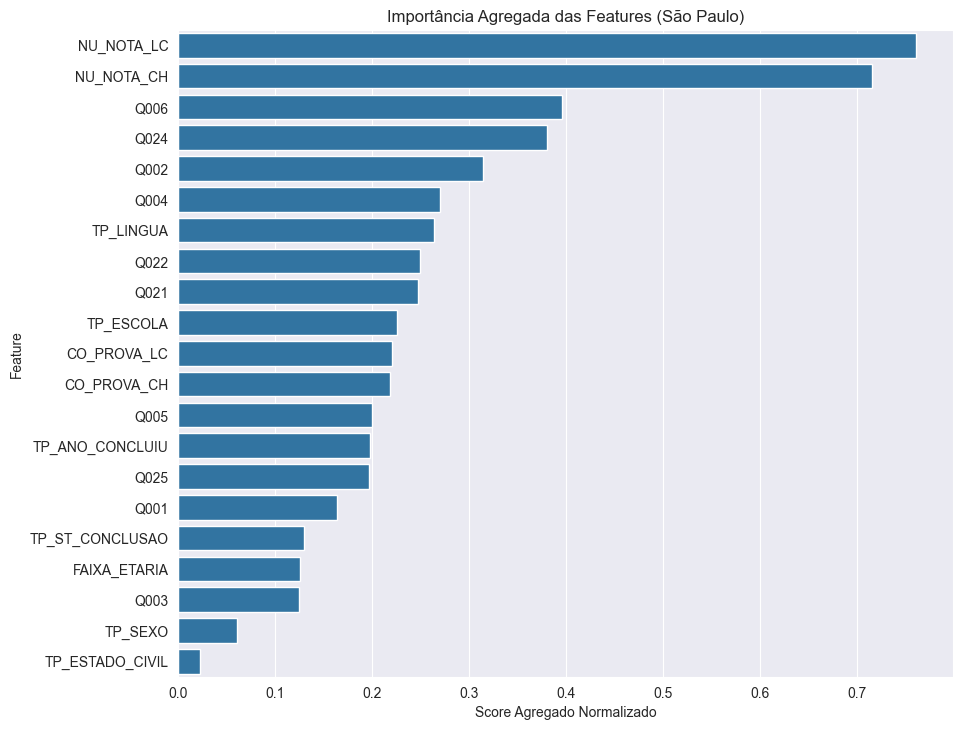

In [20]:
import warnings
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

# 1. Filtrar dados pela cidade de interesse (usando o filtro de Task 13)
X_cidade = X_processed[cidade_filter].copy()
y_cidade = y[cidade_filter].copy()

if X_cidade.empty:
    print(f"Nenhum dado encontrado para a cidade: {cidade_interesse}")
    print("Por favor, defina a variável 'cidade_interesse' na Célula 4.")
else:
    # 2. Re-escalar para Chi2 (MinMax para garantir não-negativos)
    scaler_minmax = MinMaxScaler()
    X_cidade_minmax = pd.DataFrame(
        scaler_minmax.fit_transform(X_cidade),
        columns=X_cidade.columns
    )

    # 3. Calcular Métricas
    feature_names = X_cidade_minmax.columns
    scores_df = pd.DataFrame(index=feature_names)

    # Métrica 1: Correlação Absoluta (Pearson)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=RuntimeWarning)

        correlacoes = X_cidade_minmax.corrwith(y_cidade)

    scores_df['Correlacao_Abs'] = np.abs(correlacoes).fillna(0)

    # Métrica 2: ANOVA (F-value)
    anova_f, anova_p = f_classif(X_cidade_minmax, y_cidade)
    scores_df['ANOVA_F'] = pd.Series(anova_f, index=feature_names).fillna(0)

    # Métrica 3: Chi Quadrado (Score)
    chi2_score, chi2_p = chi2(X_cidade_minmax, y_cidade)
    scores_df['Chi2_Score'] = pd.Series(chi2_score, index=feature_names).fillna(0)

    # Métrica 4: Informação Mútua
    mi_scores = mutual_info_classif(X_cidade_minmax, y_cidade, discrete_features='auto', random_state=42)
    scores_df['Mutual_Info'] = pd.Series(mi_scores, index=feature_names).fillna(0)

    # Métrica 5: Random Forest Importance
    rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    rf.fit(X_cidade_minmax, y_cidade)
    scores_df['RF_Importance'] = rf.feature_importances_

    # 4. Normalizar Métricas (0 a 1)
    scaler_norm = MinMaxScaler()
    scores_normalized = pd.DataFrame(
        scaler_norm.fit_transform(scores_df),
        columns=scores_df.columns,
        index=scores_df.index
    )

    # 5. Média Agregada e Ordenação
    scores_normalized['Media_Agregada'] = scores_normalized.mean(axis=1)
    scores_final = scores_normalized.sort_values(by='Media_Agregada', ascending=False)

    print(f"--- Importância das Features ({cidade_interesse}) ---")
    print(scores_final)

    # 6. Visualização
    plt.figure(figsize=(10, max(8, len(feature_names) * 0.4))) # Ajustar altura
    sns.barplot(x=scores_final['Media_Agregada'], y=scores_final.index)
    plt.title(f'Importância Agregada das Features ({cidade_interesse})')
    plt.xlabel('Score Agregado Normalizado')
    plt.ylabel('Feature')
    plt.show()